<a href="https://colab.research.google.com/github/renu623/Ytube-nwp/blob/main/cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.03G/1.06G [00:07<00:00, 249MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:01<00:00, 172MB/s]
100% 218M/218M [00:01<00:00, 170MB/s]


In [6]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# use the generator which convert the large  images data into batches form first enter one batch of data store in RAM this continous..going on

In [11]:
# 2 generator form one for  training data and another for testing data
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize
def process(image, label):
  image=tf.cast(image/255. , tf.float32)
  return image,label

train_ds=train_ds.map(process) # har image se ekk function ko lega or usa process ko send karega then store in train and validation
# iski jarurat isliye paddi hamma result 0 or 1 ke bich mai chahiye tha
validation_ds=validation_ds.map(process)

In [13]:
# create the CNN model
# esa architecture banigai jaha
# made 3 layer
# 1 layer 32 filter and second layer 64 filter  , 3 layer 128 filters
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2 ,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# history=model.fit(train_ds,epochs=10,validation_ds)

In [15]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 88ms/step - loss: 0.6481 - accuracy: 0.6205 - val_loss: 0.5662 - val_accuracy: 0.7110
Epoch 2/10
625/625 [==============================] - 56s 88ms/step - loss: 0.5062 - accuracy: 0.7527 - val_loss: 0.4828 - val_accuracy: 0.7632
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3743 - accuracy: 0.8304 - val_loss: 0.4916 - val_accuracy: 0.7940
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2376 - accuracy: 0.9003 - val_loss: 0.6541 - val_accuracy: 0.7776
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1282 - accuracy: 0.9506 - val_loss: 0.9013 - val_accuracy: 0.7882
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0800 - accuracy: 0.9719 - val_loss: 1.0475 - val_accuracy: 0.7716
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0527 - accuracy: 0.9819 - val_loss: 1.2683 - val_accuracy:

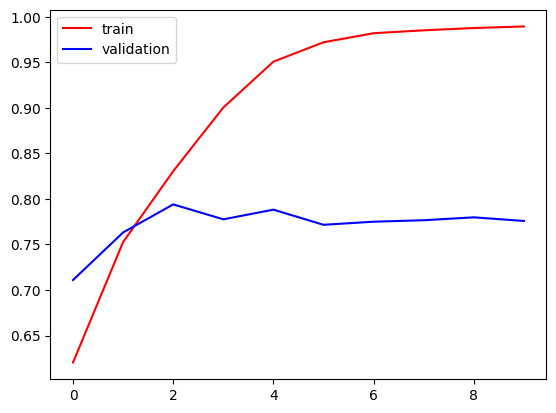

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

# in the image below, the training loss and validation loss both decrease and stabilize at a specific point:

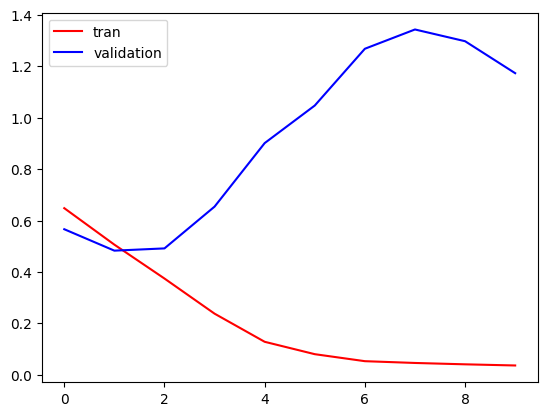

In [17]:
plt.plot(history.history['loss'],color='red',label='tran')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

way to reduce over fitting



*  add more data
*   data augementation : create data from existiing data

*   L1/L2 Regularizer
*   batch norm

*   Dropout
*   Reduce complexity









if model is overfitting :-----from keras.layers import Dense, conv2D maxpolling2D,, flatten, batchNormalization,dropout


*   model.add(BatchNormalzation())
*   model.add(Dropout(0.1))




In [18]:
import cv2

In [19]:
test_img=cv2.imread('/content/cat.2.jpg')

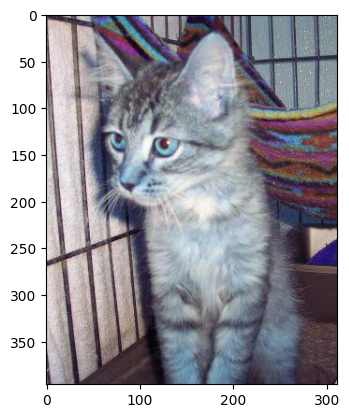

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(396, 312, 3)

In [22]:
test_img=cv2.resize(test_img,(256,256))

In [23]:
test_input=test_img.reshape((1,256,256,3));

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 241ms/step


array([[0.]], dtype=float32)

In [25]:
test_img1=cv2.imread('/content/dog.4073.jpg')

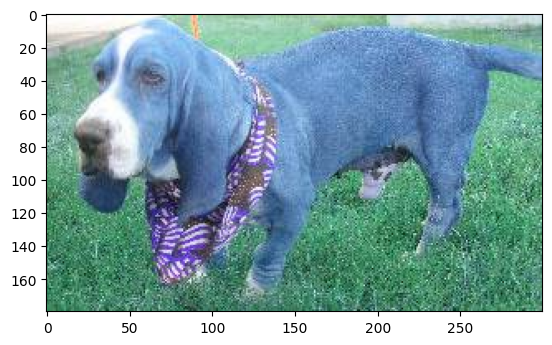

In [26]:
plt.imshow(test_img1)

In [27]:
test_img1.shape

(180, 300, 3)

In [28]:
test_img1=cv2.resize(test_img1,(256,256))

In [29]:
test_input1=test_img1.reshape((1,256,256,3))

In [30]:
model.predict(test_input1)

1/1 [==============================] - 0s 91ms/step


array([[1.]], dtype=float32)